In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.makedirs("/content/lung cancer Detection")

In [ ]:
!apt-get install unrar
!unrar x '/content/drive/MyDrive/lung_cancer_dataset.rar' '/content/lung cancer Detection'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/lung_cancer_dataset.rar

Creating    /content/lung cancer Detection/nagative                   OK
Extracting  /content/lung cancer Detection/nagative/person100_bacteria_475.jpeg       0%  OK 
Extracting  /content/lung cancer Detection/nagative/person100_bacteria_477.jpeg       0%  OK 
Extracting  /content/lung cancer Detection/nagative/person100_bacteria_478.jpeg       0%  OK 
Extracting  /content/lung cancer Detection/nagative/person100_bacteria_479.jpeg       0%  OK 
Extracting  /content/lung cancer Detection/nagative/person100_bacteria_480.jpeg       0%  OK 
Extracting  /content/lung cancer Detection/nagative/person100_

#### IMPORTING Packages

In [ ]:
import numpy as np
from tensorflow.keras import models,layers,preprocessing,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import os
import random
import shutil



#### Path Of The Directories

In [ ]:
base_dir = r'/content/lung cancer Detection'
positive = os.path.join(base_dir,'positive')
negative = os.path.join(base_dir,'nagative')
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')
train_pos_dir = os.path.join(train_dir,'positive')
train_neg_dir = os.path.join(train_dir,'negative')
test_pos_dir = os.path.join(test_dir,'positive')
test_neg_dir = os.path.join(test_dir,'negative')
validation_pos_dir = os.path.join(validation_dir,'positive')
validation_neg_dir = os.path.join(validation_dir,'negative')

#### Making Directories

In [ ]:
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)
os.mkdir(train_pos_dir)
os.mkdir(train_neg_dir)
os.mkdir(test_pos_dir)
os.mkdir(test_neg_dir)
os.mkdir(validation_pos_dir)
os.mkdir(validation_neg_dir)

In [ ]:
print(len(os.listdir(os.path.join(base_dir,'positive'))))
print(len(os.listdir(os.path.join(base_dir,'nagative'))))

234
300


#### Shuffle Images

In [ ]:
a = os.listdir(os.path.join(base_dir,'positive'))
random.shuffle(a)
a


['NORMAL2-IM-0376-0001.jpeg',
 'NORMAL2-IM-0359-0001.jpeg',
 'NORMAL2-IM-0343-0001.jpeg',
 'IM-0089-0001.jpeg',
 'NORMAL2-IM-0368-0001.jpeg',
 'NORMAL2-IM-0059-0001.jpeg',
 'IM-0011-0001-0001.jpeg',
 'NORMAL2-IM-0035-0001.jpeg',
 'NORMAL2-IM-0145-0001.jpeg',
 'IM-0027-0001.jpeg',
 'IM-0071-0001.jpeg',
 'NORMAL2-IM-0221-0001.jpeg',
 'NORMAL2-IM-0173-0001-0002.jpeg',
 'NORMAL2-IM-0139-0001.jpeg',
 'NORMAL2-IM-0213-0001.jpeg',
 'IM-0067-0001.jpeg',
 'IM-0075-0001.jpeg',
 'NORMAL2-IM-0285-0001.jpeg',
 'IM-0019-0001.jpeg',
 'NORMAL2-IM-0120-0001.jpeg',
 'NORMAL2-IM-0374-0001.jpeg',
 'IM-0028-0001.jpeg',
 'NORMAL2-IM-0381-0001.jpeg',
 'NORMAL2-IM-0229-0001.jpeg',
 'NORMAL2-IM-0066-0001.jpeg',
 'IM-0017-0001.jpeg',
 'NORMAL2-IM-0195-0001.jpeg',
 'NORMAL2-IM-0060-0001.jpeg',
 'IM-0105-0001.jpeg',
 'NORMAL2-IM-0370-0001.jpeg',
 'IM-0107-0001.jpeg',
 'IM-0013-0001.jpeg',
 'NORMAL2-IM-0249-0001.jpeg',
 'NORMAL2-IM-0051-0001.jpeg',
 'IM-0021-0001.jpeg',
 'NORMAL2-IM-0030-0001.jpeg',
 'NORMAL2-IM-0

#### Divide images into 3 parts Training,Test,Validation

In [ ]:
positive_images = os.listdir(positive)
random.shuffle(positive_images)
negative_images = os.listdir(negative)
random.shuffle(negative_images)
train_pos_images = positive_images[:150]
train_neg_images = negative_images[:150]
validation_pos_images = positive_images[150:190]
validation_neg_images = negative_images[150:230]
test_pos_images = positive_images[190:]
test_neg_images = negative_images[230:]


#### Copying each part into Their respective folded

In [ ]:
for img in train_pos_images:
    src = os.path.join(positive,img)
    dst = os.path.join(train_pos_dir,img)
    shutil.copy(src,dst)

for img in train_neg_images:
    src = os.path.join(negative,img)
    dst = os.path.join(train_neg_dir,img)
    shutil.copy(src,dst)

for img in validation_pos_images:
    src = os.path.join(positive,img)
    dst = os.path.join(validation_pos_dir,img)
    shutil.copy(src,dst)

for img in validation_neg_images:
    src = os.path.join(negative,img)
    dst = os.path.join(validation_neg_dir,img)
    shutil.copy(src,dst)

for img in test_pos_images:
    src = os.path.join(positive,img)
    dst = os.path.join(test_pos_dir,img)
    shutil.copy(src,dst)

for img in test_neg_images:
    src = os.path.join(negative,img)
    dst = os.path.join(test_neg_dir,img)
    shutil.copy(src,dst)


In [ ]:
print(len(test_pos_images))
print(len(test_neg_images))

44
70


#### Making Generator By using inbuilt Tensorflow Function for applying data augmentation

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255,brightness_range=(0.2,0.6),vertical_flip=True,horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)


#### passing validaton images and train images into generator

In [ ]:
train_gen = train_data_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=32)
val_gen = test_data_gen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='binary',batch_size=32)

Found 300 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
for data,label in train_gen:
    print(data.shape)
    print(label.shape)
    break

(32, 150, 150, 3)
(32,)


#### Making Model Architecture

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',padding="same",input_shape=(150,150,3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPool2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 32)                11214880  
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

#### Training or Fitting and Validating model by using training and validation images

In [ ]:
history = model.fit_generator(train_gen,steps_per_epoch=10,epochs=10,validation_data=val_gen,validation_steps=4)

<ipython-input-19-49aa7fca2cf5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,steps_per_epoch=10,epochs=10,validation_data=val_gen,validation_steps=4)


Epoch 1/10
10/10 [==============================] - 42s 4s/step - loss: 2.7088 - accuracy: 0.4967 - val_loss: 0.7124 - val_accuracy: 0.3583
Epoch 2/10
10/10 [==============================] - 22s 2s/step - loss: 0.6969 - accuracy: 0.5333 - val_loss: 0.7102 - val_accuracy: 0.3583
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 0.6863 - accuracy: 0.5500 - val_loss: 0.6695 - val_accuracy: 0.4250
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.7058 - accuracy: 0.7167 - val_loss: 1.6420 - val_accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 21s 2s/step - loss: 0.6739 - accuracy: 0.6233 - val_loss: 0.6782 - val_accuracy: 0.4250
Epoch 6/10
10/10 [==============================] - 23s 2s/step - loss: 0.7546 - accuracy: 0.6433 - val_loss: 0.8255 - val_accuracy: 0.3667
Epoch 7/10
10/10 [==============================] - 21s 2s/step - loss: 0.6481 - accuracy: 0.7100 - val_loss: 0.4480 - val_accuracy: 0.8167
Epoch 8/10
10/10 [==

In [ ]:
model.save('/content/drive/MyDrive/lungs_cancer_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### passing Test Images Into Generator for evalution of model

In [ ]:
val_gen = test_data_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=32)
test = model.evaluate_generator(val_gen)

Found 114 images belonging to 2 classes.


<ipython-input-21-4e5984ae3a61>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test = model.evaluate_generator(val_gen)


####  Printing Test Result

In [ ]:
test

[0.47960278391838074, 0.7719298005104065]

#### =======================================================================================================

#### Making Model by using Feature Extraction fron pretrained convent (VGG16)

In [ ]:
conv = VGG16(include_top=False,input_shape=(150,150,3))
conv.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

#### Featture Extraction Method

In [ ]:
def feature_extraction(directory,sample_count,vertical_flip=False,horizontal_flip=False,zoom_range=0.0):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    gen = ImageDataGenerator(rescale=1./255,vertical_flip=vertical_flip,horizontal_flip=horizontal_flip,zoom_range=zoom_range)
    data_gen = gen.flow_from_directory(directory,target_size=(150,150),class_mode='binary',batch_size=30)
    i=0
    for img_batch,label_batch in data_gen:
        prediction = conv.predict(img_batch)
        features[i*30 : (i+1)*30] = prediction
        labels[i*30:(i+1)*30] = label_batch
        i+=1
        if i*30 >= sample_count:
            return features,labels


#### passing train images and validation images to Feature Extraction method

In [ ]:
train_features = feature_extraction(train_dir,300,vertical_flip=True,horizontal_flip=True,zoom_range=(0.2,0.5))
validation_features = feature_extraction(validation_dir,120)

Found 300 images belonging to 2 classes.
1/1 [==============================] - 8s 8s/step
Found 120 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step


#### making model Architecture

In [ ]:
model = models.Sequential()
# model2.add(layers.MaxPool2D((2,2)))
# model2.add(layers.Flatten())
# model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(32,activation='relu'))
# # model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(1,activation='sigmoid'))


model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['acc'])
# model.summary()


#### Training Or Fitting The Model

In [ ]:
print((train_features[0]).shape)
history = model.fit(train_features[0],train_features[1],epochs=10,batch_size=32,validation_data=validation_features)

(300, 4, 4, 512)
Epoch 1/10
10/10 [==============================] - 1s 30ms/step - loss: 0.7003 - acc: 0.5633 - val_loss: 0.6921 - val_acc: 0.5167
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6986 - acc: 0.5567 - val_loss: 0.6959 - val_acc: 0.4917
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.7090 - acc: 0.5033 - val_loss: 0.6987 - val_acc: 0.4917
Epoch 4/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6966 - acc: 0.5433 - val_loss: 0.7018 - val_acc: 0.4833
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.7047 - acc: 0.5133 - val_loss: 0.7051 - val_acc: 0.4667
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.6994 - acc: 0.5133 - val_loss: 0.7078 - val_acc: 0.4583
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.6977 - acc: 0.5500 - val_loss: 0.7117 - val_acc: 0.4667
Epoch 8/10
10/10 [==============================] - 0s 10ms/step -

#### ======================================================================================================

#### Making Model Architecture By using convent as an layer but freeze convent from training

In [ ]:
conv.trainable = False
model = models.Sequential()
model.add(conv)
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

#### Model Summary

In [ ]:
model.summary()

####  Training or Fitting Model

In [ ]:
# model.fit(train_gen,steps_per_epoch=10,epochs=5,validation_data=val_gen,validation_steps=5)
history = model.fit(train_gen,epochs=5,steps_per_epoch=10,validation_data=val_gen,validation_steps=4)

Epoch 1/5
10/10 [==============================] - 127s 13s/step - loss: 0.8699 - acc: 0.5067 - val_loss: 1.0378 - val_acc: 0.3860
Epoch 2/5
10/10 [==============================] - 116s 12s/step - loss: 0.8088 - acc: 0.5067 - val_loss: 0.9509 - val_acc: 0.3860
Epoch 3/5
10/10 [==============================] - 126s 13s/step - loss: 0.8042 - acc: 0.4967 - val_loss: 0.8845 - val_acc: 0.3860
Epoch 4/5
10/10 [==============================] - 116s 12s/step - loss: 0.7882 - acc: 0.5067 - val_loss: 0.8343 - val_acc: 0.3860
Epoch 5/5
10/10 [==============================] - 128s 13s/step - loss: 0.7489 - acc: 0.5233 - val_loss: 0.7988 - val_acc: 0.3947


#### =================================================Fine Tuning===================================

#### Freeze convent From learning except few lower layers

In [ ]:
conv.trainable = True
set_trainable = False
for layer in conv.layers:
    if layer.name == 'block5':
        set_trainableinable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### Making Architeture

In [ ]:
model = models.Sequential()
model.add(conv)
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])


#### Summary Of the model

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 512)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                65568     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
history = model.fit(train_gen,epochs=10,steps_per_epoch=10,validation_data=val_gen,validation_steps=4)

Epoch 1/10
10/10 [==============================] - 129s 13s/step - loss: 0.7138 - acc: 0.5000 - val_loss: 0.6805 - val_acc: 0.5351
Epoch 2/10
10/10 [==============================] - 127s 13s/step - loss: 0.7217 - acc: 0.4800 - val_loss: 0.6774 - val_acc: 0.5614
Epoch 3/10
10/10 [==============================] - 128s 13s/step - loss: 0.7057 - acc: 0.5400 - val_loss: 0.6772 - val_acc: 0.5614
Epoch 4/10
10/10 [==============================] - 117s 12s/step - loss: 0.7051 - acc: 0.5200 - val_loss: 0.6734 - val_acc: 0.6053
Epoch 5/10
10/10 [==============================] - 127s 13s/step - loss: 0.6933 - acc: 0.5567 - val_loss: 0.6801 - val_acc: 0.5175
Epoch 6/10
10/10 [==============================] - 118s 12s/step - loss: 0.7010 - acc: 0.5333 - val_loss: 0.6774 - val_acc: 0.5351
Epoch 7/10
10/10 [==============================] - 128s 13s/step - loss: 0.7122 - acc: 0.5333 - val_loss: 0.6746 - val_acc: 0.5702
Epoch 8/10
10/10 [==============================] - 127s 13s/step - loss: 0.

In [ ]:
train_features,train_labels = feature_extraction(train_dir,300,vertical_flip=True,horizontal_flip=True,zoom_range=(0.2,0.5))
validation_features,validation_labels = feature_extraction(validation_dir,120)

Found 300 images belonging to 2 classes.
1/1 [==============================] - 7s 7s/step
Found 120 images belonging to 2 classes.
1/1 [==============================] - 7s 7s/step


In [ ]:
a = np.array(train_labels)
b = np.array(validation_labels)
concatenated_array = np.concatenate((a, b), axis=0)
print(concatenated_array.shape)
a[1:10] + a[10:100]

(420,)


ValueError: ignored

####  ============================= Applying K-fold Technique ===============================================

In [ ]:
def feature_extraction(directory,sample_count,vertical_flip=False,horizontal_flip=False,zoom_range=0.0):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    gen = ImageDataGenerator(rescale=1./255,vertical_flip=vertical_flip,horizontal_flip=horizontal_flip,zoom_range=zoom_range)
    data_gen = gen.flow_from_directory(directory,target_size=(150,150),class_mode='binary',batch_size=30)
    i=0
    for img_batch,label_batch in data_gen:
        prediction = conv.predict(img_batch)
        features[i*30 : (i+1)*30] = prediction
        labels[i*30:(i+1)*30] = label_batch
        i+=1
        if i*30 >= sample_count:
            return features,labels

In [ ]:
conv = VGG16(include_top=False,input_shape=(150,150,3))
conv.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
train_features,train_labels = feature_extraction(train_dir,300,vertical_flip=True,horizontal_flip=True,zoom_range=(0.2,0.5))
validation_features,validation_labels = feature_extraction(validation_dir,120)
train_features = np.concatenate((train_features,validation_features), axis=0)
train_labels =np.concatenate((train_labels,validation_labels),axis=0)

print((train_features.shape))



Found 300 images belonging to 2 classes.
1/1 [==============================] - 0s 24ms/step
Found 120 images belonging to 2 classes.
1/1 [==============================] - 0s 25ms/step
(420, 4, 4, 512)


In [ ]:
print((train_features[0].shape))

(4, 4, 512)


#### Applying Feature Extraction Method

In [ ]:
print((np.reshape(train_labels,(420))))
# print((validation_labels))
len(train_labels)

[1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.

420

####  Making build Model Function

In [ ]:
def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))  # Adjust input shape here
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['acc'])
    return model

#### applying K- Fold Technique By using above function In which Number of Folds is 5 also training the model and Number Of Ecpochs 10

In [ ]:

folds = 5
sample_per_fold = len(train_labels)//folds
validation_score = []
for fold in range(folds) :
    print('fold # ', fold)
    validatoin_data = train_features[fold * sample_per_fold : (fold+1)*sample_per_fold]
    validation_label = train_labels[fold*sample_per_fold : (fold+1)*sample_per_fold]
    train_data = np.concatenate([train_features[:fold * sample_per_fold],train_features[(fold + 1) * sample_per_fold:]],axis=0)
    train_label = np.concatenate([train_labels[:fold * sample_per_fold],train_labels[(fold + 1) * sample_per_fold:]],axis=0)
    input_shape = (4, 4, 512)
    model = build_model(input_shape)
    history = model.fit(train_data, train_label,epochs=10, batch_size=32)
    validation_score.append(history.history['val_acc'])



print(validation_score)

fold #  0
(336,)
(336, 4, 4, 512)
(84, 4, 4, 512)
(84,)
Epoch 1/10
11/11 [==============================] - 3s 5ms/step - loss: 0.7603 - acc: 0.4732
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7158 - acc: 0.5417
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7081 - acc: 0.5565
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6853 - acc: 0.5982
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7007 - acc: 0.5625
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7138 - acc: 0.5417
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6838 - acc: 0.5685
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6788 - acc: 0.6042
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7142 - acc: 0.5446
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6870 - acc: 0.5685
fold #  1
(33

#### Applying K- Fold Method With number of epochs 500

In [ ]:
folds=5
num_val_samples = len(train_labels)//folds
num_epochs = 500
all_mae_histories = []
for i in range(folds):
    print('processing fold #', i)
    val_data = train_features[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_features[:i * num_val_samples],train_features[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    input_shape = (4, 4, 512)
    model = build_model(input_shape)
    history = model.fit(train_features,train_labels,epochs=num_epochs, batch_size=32,validation_data=(val_data,val_targets),verbose=0)
    val_history = history.history['val_acc']
    validation_score.append(val_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


#### Checking Validation Score

In [ ]:
validation_score

[[0.511904776096344,
  0.5714285969734192,
  0.5833333134651184,
  0.511904776096344,
  0.5,
  0.5357142686843872,
  0.5595238208770752,
  0.6547619104385376,
  0.6785714030265808,
  0.6785714030265808,
  0.7023809552192688,
  0.726190447807312,
  0.6904761791229248,
  0.6785714030265808,
  0.6785714030265808,
  0.6666666865348816,
  0.6785714030265808,
  0.7023809552192688,
  0.7023809552192688,
  0.7023809552192688,
  0.726190447807312,
  0.7023809552192688,
  0.726190447807312,
  0.7142857313156128,
  0.6904761791229248,
  0.7023809552192688,
  0.7023809552192688,
  0.7023809552192688,
  0.738095223903656,
  0.7142857313156128,
  0.726190447807312,
  0.7142857313156128,
  0.738095223903656,
  0.738095223903656,
  0.7023809552192688,
  0.75,
  0.7142857313156128,
  0.75,
  0.75,
  0.726190447807312,
  0.7142857313156128,
  0.75,
  0.75,
  0.726190447807312,
  0.726190447807312,
  0.7023809552192688,
  0.726190447807312,
  0.726190447807312,
  0.726190447807312,
  0.75,
  0.7261904478

#### Finding Mean Validation Score

In [ ]:
np.mean(validation_score)

0.8233619040489196

In [ ]:
len(validation_score)

5

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_data_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=32)
for data,label in test_gen:
    print(data.shape)
    print(label.shape)
    break

Found 114 images belonging to 2 classes.
(32, 150, 150, 3)
(32,)


#### Evaluate Model on test Data

In [ ]:
test_feature,test_label = feature_extraction(test_dir,114)
test = model.evaluate(test_feature,test_label)

Found 114 images belonging to 2 classes.
4/4 [==============================] - 0s 4ms/step - loss: 0.2774 - acc: 0.8509


#### Test Results

In [ ]:
test

[0.277378648519516, 0.8508771657943726]

####  checking mean As per Epochs

In [ ]:
print(len(validation_score))
print(len(validation_score[0]))
for i in range(num_epochs):
    a = []
    for x in validation_score:
#         print(x)
        a.append(x[i])
        print(i)
#     print(a)
    m = np.mean(a)
    break
# print(m)


val = np.array(validation_score)
print(val.shape)
mean = np.mean(val,axis=0)
mean.shape
mean[0]

5
500
0
0
0
0
0
(5, 500)


0.5452381014823914

In [ ]:
average_val_history = np.mean(val,axis=0)

####  Taking mean As per Epochs and Visualize The result

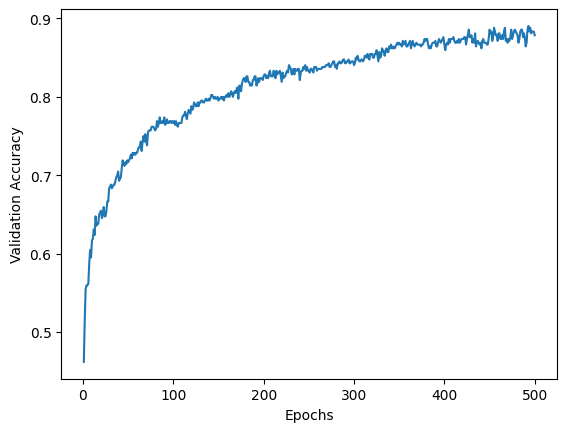

In [ ]:
average_val_history = [np.mean([x[i] for x in validation_score]) for i in range(num_epochs)]
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_val_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.savefig('/content/drive/MyDrive/lung_cancer_model/validation_accuracy_plot85%.png')
plt.show()

#### Saving And Loading The Model

In [ ]:
model.save('/content/drive/MyDrive/lung_cancer_model/lungs_cancer_classification85%.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.callbacks import ModelCheckpoint

folds = 5
num_val_samples = len(train_labels) // folds
num_epochs = 500
all_mae_histories = []
validation_score = []

# Define the filepath to save the best weights
checkpoint_filepath = 'best_weights.h5'

# Initialize the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1


)

for i in range(folds):
    print('Processing fold #', i)
    val_data = train_features[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_features[:i * num_val_samples],train_features[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]], axis=0)
    input_shape = (4, 4, 512)
    model = build_model(input_shape)
    history = model.fit(
        train_features, train_labels, epochs=num_epochs, batch_size=32,
        validation_data=(val_data, val_targets), verbose=0,
        callbacks=[checkpoint_callback]  # Include the ModelCheckpoint callback
    )
    val_history = history.history['val_acc']
    validation_score.append(val_history)

# Restore the best weights of the model
model.load_weights(checkpoint_filepath)


Streaming output truncated to the last 5000 lines.

Epoch 3: val_acc did not improve from 0.50000

Epoch 4: val_acc did not improve from 0.50000

Epoch 5: val_acc did not improve from 0.50000

Epoch 6: val_acc did not improve from 0.50000

Epoch 7: val_acc did not improve from 0.50000

Epoch 8: val_acc did not improve from 0.50000

Epoch 9: val_acc did not improve from 0.50000

Epoch 10: val_acc did not improve from 0.50000

Epoch 11: val_acc did not improve from 0.50000

Epoch 12: val_acc did not improve from 0.50000

Epoch 13: val_acc did not improve from 0.50000

Epoch 14: val_acc did not improve from 0.50000

Epoch 15: val_acc did not improve from 0.50000

Epoch 16: val_acc improved from 0.50000 to 0.51190, saving model to best_weights.h5

Epoch 17: val_acc did not improve from 0.51190

Epoch 18: val_acc did not improve from 0.51190

Epoch 19: val_acc improved from 0.51190 to 0.52381, saving model to best_weights.h5

Epoch 20: val_acc did not improve from 0.52381

Epoch 21: val_acc

In [ ]:
validation_score

[[0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.511904776096344,
  0.511904776096344,
  0.511904776096344,
  0.523809552192688,
  0.523809552192688,
  0.523809552192688,
  0.523809552192688,
  0.523809552192688,
  0.523809552192688,
  0.523809552192688,
  0.5595238208770752,
  0.5952380895614624,
  0.5952380895614624,
  0.5833333134651184,
  0.5833333134651184,
  0.6071428656578064,
  0.5952380895614624,
  0.6190476417541504,
  0.6428571343421936,
  0.6190476417541504,
  0.6309523582458496,
  0.6666666865348816,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6904761791229248,
  0.6904761791229248,
  0.7142857313156128,
  0.726190447807312,
  0.726190447807312,
  0.7142857313156128,
  0.7023809552192688,
  0.7142857313156128,
  0.7142857313156128,
  0.7142857313156128,
  0.7142857313156128,
  0.738095223903656,
  0.738095223903656,
  0.726190447807312,
  0.738095223903656,
  0.726190447807312,
  0.726190

In [ ]:
np.mean(validation_score)

0.8148190479874611

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_data_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=32)
for data,label in test_gen:
    print(data.shape)
    print(label.shape)
    break

Found 114 images belonging to 2 classes.
(32, 150, 150, 3)
(32,)


In [ ]:
test_feature,test_label = feature_extraction(test_dir,114)
test = model.evaluate(test_feature,test_label)

Found 114 images belonging to 2 classes.
4/4 [==============================] - 0s 6ms/step - loss: 0.2638 - acc: 0.8684


In [ ]:
test

[0.26375821232795715, 0.8684210777282715]

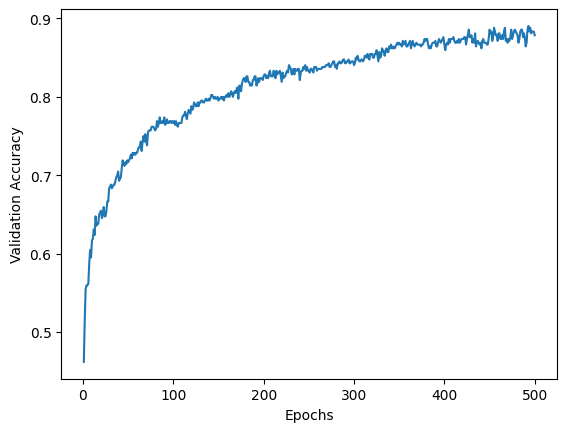

In [ ]:
average_val_history = [np.mean([x[i] for x in validation_score]) for i in range(num_epochs)]
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_val_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.savefig('/content/drive/MyDrive/lung_cancer_model/validation_accuracy_plot86%.png')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/lung_cancer_model/lungs_cancer_classification86%.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
test_features,test_labels = feature_extraction(test_dir,114)
# Assuming you have your test data and labels loaded as test_features and test_labels

# Get predictions on the test data using the trained model
predictions = model.predict(test_features)

# Convert predictions from probabilities to class labels (assuming binary classification)
predicted_labels = (predictions > 0.6).astype(int)

# Calculate F1 score
f1 = f1_score(test_labels, predicted_labels)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)


Found 114 images belonging to 2 classes.
4/4 [==============================] - 0s 3ms/step
F1 Score: 0.810126582278481
Confusion Matrix:
[[67  3]
 [12 32]]


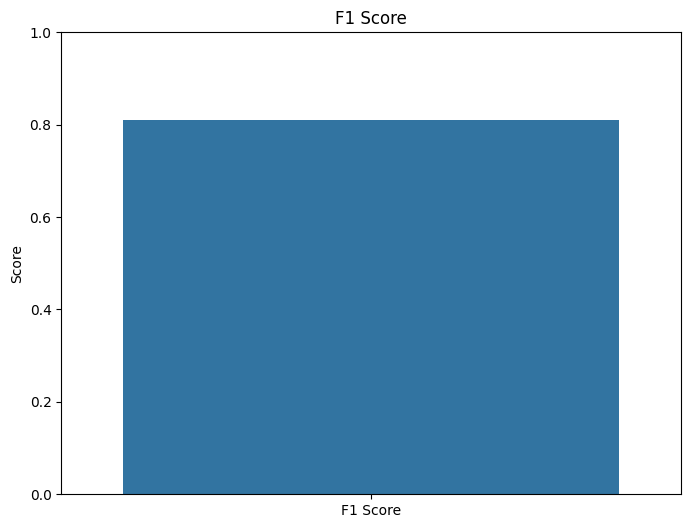

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=["F1 Score"], y=[f1])
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Score")
plt.savefig('/content/drive/MyDrive/lung_cancer_model/F1_score.png')
plt.show()

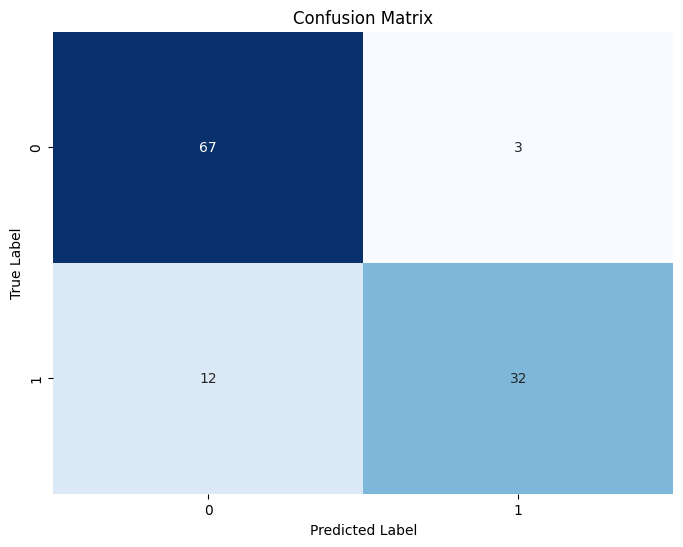

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('/content/drive/MyDrive/lung_cancer_model/confucious_martix.png')
plt.show()

In [ ]:
model.save('lungs_cancer_classification.sav')

In [ ]:
network = models.load_model('lungs_cancer_classification.sav')

In [ ]:
network.summary()

In [ ]:
print(test_feature[0].shape)
print(test_label[50])

network.predict(test_feature)[50]

In [ ]:
network.evaluate(test_feature,test_label)

In [ ]:
!apt-get install unrar


In [ ]:
model = models.load_model

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:
model = models.load_model("/content/drive/MyDrive/lungs_cancer_classification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tfjs.converters.save_keras_model(model,"/content/drive/MyDrive/json_model")

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
model = models.load_model("/content/drive/MyDrive/lung_cancer_model/lungs_cancer_classification85%.h5")

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dropout_14 (Dropout)        (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 32)                262176    
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 262209 (1.00 MB)
Trainable params: 262209 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def feature_extraction(directory,sample_count,vertical_flip=False,horizontal_flip=False,zoom_range=0.0):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    gen = ImageDataGenerator(rescale=1./255,vertical_flip=vertical_flip,horizontal_flip=horizontal_flip,zoom_range=zoom_range)
    data_gen = gen.flow_from_directory(directory,target_size=(150,150),class_mode='binary',batch_size=30)
    i=0
    for img_batch,label_batch in data_gen:
        prediction = conv.predict(img_batch)
        features[i*30 : (i+1)*30] = prediction
        labels[i*30:(i+1)*30] = label_batch
        i+=1
        if i*30 >= sample_count:
            return features,labels

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.applications import VGG16

model = models.load_model("/content/drive/MyDrive/lung_cancer_model/lungs_cancer_classification86%.h5")

# Open the image with error handling
try:
    image = Image.open("/content/lung cancer Detection/test/negative/person137_bacteria_655.jpeg")
except FileNotFoundError:
    print("Error: Image file not found.")
    exit(1)
except Exception as e:
    print(f"Error opening image: {e}")
    exit(1)

# Convert to RGB if necessary
if image.mode != "RGB":
    image = image.convert("RGB")

# Resize the image to 128x128 pixels
resized_image = image.resize((150, 150))

# Convert the resized image to a numpy array and normalize pixel values
resized_image_array = np.array(resized_image) / 255.0
resized_image_array = resized_image_array.reshape(1, 150, 150, 3)
# resized_image_array = resized_image_array.flatten()
conv = VGG16(include_top=False,input_shape=(150,150,3))
prediction = conv.predict(resized_image_array)
prediction = model.predict(prediction)

if(prediction > 0.6):
  confidence = prediction[0][0] * 100
  print(f"Lung Cancer Detected Confidence: {confidence:.2f}%")
else:
  confidence = (1 - prediction[0][0]) * 100
  print(f"Lung Cancer Not Detected Confidence: {confidence:.2f}%")



1/1 [==============================] - 0s 84ms/step
Lung Cancer Not Detected Confidence: 97.48%


In [ ]:

model.predict("")